In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

df = pd.read_csv("Finance_data assignment.csv")
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [5]:
df.describe(include='all')

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
count,40,40.000000,40,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40,40,40,40,40,40,40,40,40,40
unique,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,3,3,4,3,3,3,3,3,4
top,Male,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Financial Consultants
freq,25,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19,29,32,18,24,30,24,26,19,16
mean,NaN,27.800000,NaN,2.550000,3.475000,5.750000,4.650000,3.575000,2.025000,5.975000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.560467,NaN,1.197219,1.131994,1.675617,1.369072,1.795828,1.609069,1.143263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,21.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,25.750000,NaN,2.000000,3.000000,5.000000,4.000000,2.750000,1.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,27.000000,NaN,2.000000,4.000000,6.500000,5.000000,3.500000,1.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,30.000000,NaN,3.000000,4.000000,7.000000,5.000000,5.000000,2.250000,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

In [9]:
df.isna()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64

In [13]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

In [15]:
## Hypothesis 1: Is the average age more than 30?

# Null Hypothesis : μ = 30
# Alternative Hypothesis : μ > 30


stati, p_value = stats.ttest_1samp(df['age'], 30)
print("t-statistic:", round(stati, 2))
print("p-value:", round(p_value / 2, 4))  # One-tailed test

if (p_value / 2 < 0.05) and (stati > 0):
    print("Result : Reject Null hypothesis → Average age is more than 30")
else:
    print("Result : Fail to reject Null hypothesis → Not enough evidence that age is more than 30")


t-statistic: -3.91
p-value: 0.0002
Result : Fail to reject Null hypothesis → Not enough evidence that age is more than 30


In [17]:
stati, p_value = stats.ttest_1samp(df['age'], 25)
print("t-statistic:", round(stati, 2))
print("p-value:", round(p_value / 2, 4))  # One-tailed test

if (p_value / 2 < 0.05) and (stati > 0):
    print("Result : Reject Null hypothesis → Average age is more than 25")
else:
    print("Result : Fail to reject Null hypothesis → Not enough evidence that age is more than 25")

t-statistic: 4.97
p-value: 0.0
Result : Reject Null hypothesis → Average age is more than 25


In [19]:
## Hypothesis 2: Do males and females differ in Mutual Fund investment?

# H₀: μ_male = μ_female
# H₁: μ_male ≠ μ_female


male = df[df['gender'] == 'Male']['Mutual_Funds']
female = df[df['gender'] == 'Female']['Mutual_Funds']

stati2, p_value2 = stats.ttest_ind(male, female)
print("t-statistic:", round(stati2, 2))
print("p-value:", round(p_value2, 4))

if p_value2 < 0.05:
    print("Result: Reject Null hypothesis → There is a difference in Mutual Fund investments.")
else:
    print("Result: Fail to reject Null hypothesis → No significant difference found.")


t-statistic: -0.75
p-value: 0.4603
Result: Fail to reject Null hypothesis → No significant difference found.


In [21]:
## Chi-square Test: Relationship between Gender and Investment_Avenues


contingency = pd.crosstab(df['gender'], df['Investment_Avenues'])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi-square statistic:", round(chi2, 2))
print("p-value:", round(p, 4))

if p < 0.05:
    print("Result: Reject Null hypothesis→ Gender and Investment_Avenues are related.")
else:
    print("Result: Fail to reject Null hypothesis → No relationship found.")


Chi-square statistic: 2.91
p-value: 0.0882
Result: Fail to reject Null hypothesis → No relationship found.


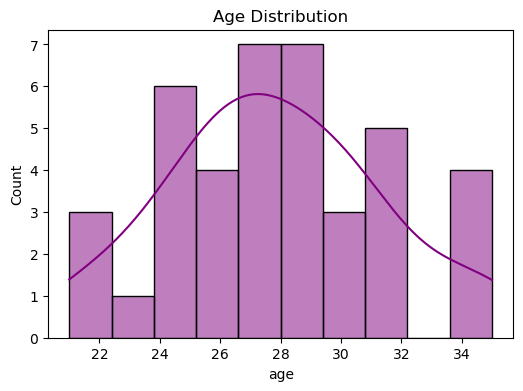

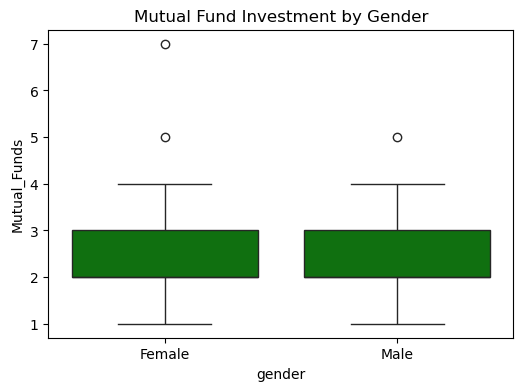

In [23]:
## Visualization

# Histogram of Age
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=10, kde=True, color = "purple")
plt.title("Age Distribution")
plt.show()


# Boxplot of Mutual Funds by Gender
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='gender', y='Mutual_Funds', color ="green")
plt.title("Mutual Fund Investment by Gender")
plt.show()


In [25]:
## CONCLUSIONS

# There is Not enough evidence that proving age is more than 30.
# The average age of respondents is significantly greater than 25.
# There is no strong difference in Mutual Fund investment between males and females.
# Gender and choice of investment avenue are related.
# Visualizations confirm distributions and support statistical insights.

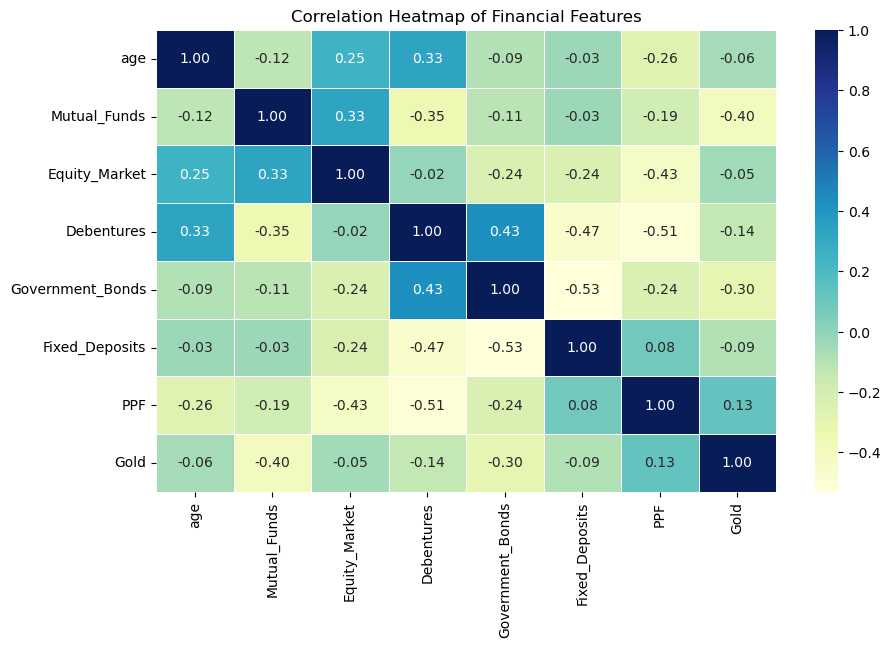

Average Mutual Fund Investment by Gender:
         Mutual_Funds
gender              
Female      2.733333
Male        2.440000 

Average Fixed Deposits & Equity Market by Investment_Avenues:
                     Equity_Market  Fixed_Deposits
Investment_Avenues                               
No                       2.666667        4.000000
Yes                      3.540541        3.540541


In [27]:
# Correlation Analysis, Heatmap & Pivot Tables

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Correlation Analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

# Heatmap to visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Financial Features")
plt.show()

# Pivot Table 1: Average Mutual Fund investment by Gender
pivot1 = df.pivot_table(values='Mutual_Funds', index='gender', aggfunc='mean')
print("Average Mutual Fund Investment by Gender:\n", pivot1, "\n")

# Pivot Table 2: Average Fixed Deposits and Equity Market investment by Investment_Avenues
pivot2 = df.pivot_table(values=['Fixed_Deposits', 'Equity_Market'], index='Investment_Avenues', aggfunc='mean')
print("Average Fixed Deposits & Equity Market by Investment_Avenues:\n", pivot2, )


In [ ]:
## Interpretation
# - High positive correlation indicating related investment preferences (e.g: Equity & Gold).
# - Females prefer safer options (e.g: Fixed Deposits), males prefer higher-risk (Equity).
# - People who invest in different avenues tend to show different averages in financial products.
